In [1]:
from pathlib import Path
from ipyleaflet import Map, LayersControl, LayerGroup, Polygon, GeoJSON, LegendControl, FullScreenControl, basemaps, basemap_to_tiles
from ipywidgets.embed import embed_minimal_html
import json
import random
from tqdm.auto import tqdm
import pandas as pd
from itertools import chain
from matplotlib import cm
from matplotlib.colors import ListedColormap,LinearSegmentedColormap
#from shapely.geometry import Point, LineString
from geojson import Feature, LineString
import numpy as np
import geopandas as gpd
from geojson_length import calculate_distance, Unit
from shapely.geometry import Point as geoPoint, Polygon as geoPolygon
from shapely import wkt
import geojson
from pyproj import Geod
from area import area
import random
import networkx as nx
import matplotlib.pyplot as plt
import math
from matplotlib.cm import ScalarMappable

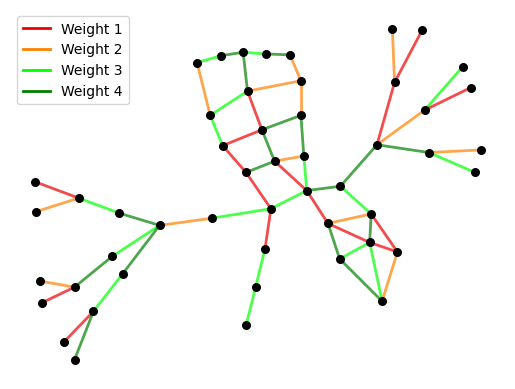

In [2]:
weight =  {
('a','c'): 1,
('b','c'): 2,
('c','d'): 3,
('d','e'): 4,
('f','h'): 2,
('g','h'): 1,
('h','i'): 4,
('i','e'): 3,
('j','l'): 1,
('k','l'): 4,
('l','m'): 3,
('m','e'): 4,
('e','n'): 2,
('n','o'): 3,
('o','p'): 1,
('p','q'): 4,
('q','r'): 3,
('q','k1'): 2,
('q','t'): 2,
('p','s'): 1,
('s','v'): 3,
('v','e1'): 2,
('e1','d1'): 3,
('d1','c1'): 4,
('c1','b1'): 3,
('b1','a1'): 4,
('o','k1'): 3,
('k1','q'): 1,
('k1','r'): 3,
('q','r'): 2,
('q','t'): 4,
('t','w'): 1,
('w','c1'): 4,
('v','w'): 3,
('t','s'): 1,
('r','u'): 4,
('u','z'): 2,
('z','a1'): 2,
('w','z'): 2,
('u','t'): 4,
('o','g1'): 1,
('g1','h1'): 3,
('h1','i1'): 3,
('k1','f1'): 4,
('f1','l1'): 3,
('l1','n1'): 1,
('n1','o1'): 2,
('k1','j1'): 1,
('j1','m1'): 4,
('m1','o1'): 4,
('j1','l1'): 2,
('j1','b2'): 1,
('l1','b2'): 4,
('m1','b2'): 3,
('b2','o1'): 3,
('b2','n1'): 1,
('f1','p1'): 4,
('p1','q1'): 1,
('q1','r1'): 2,
('q1','s1'): 1,
('p1','t1'): 2,
('t1','u1'): 3,
('t1','v1'): 1,
('p1','w1'): 4,
('w1','z1'): 2,
('w1','a2'): 3,
}
G = nx.Graph()
for endpoints, weight in weight.items():
    G.add_edge(endpoints[0], endpoints[1], weight=weight)

# shift_weight =  {1: 4, 2: 3, 3: 2, 4: 1}
# for endpoint1, endpoint2, data in G.edges(data=True):
#     data['weight'] = shift_weight[data['weight']]
colors =  {1: '#EE0000', 2: '#FF8000', 3: '#00FF00', 4: '#008000'}

# Get the positions of the nodes (using the node coordinates as positions)
pos = {
'a' : np.array([-5.0215337305401,1.223265423794]),
'b' : np.array([-5.001068614261,0.7730328656544]),
'c' : np.array([-4.2438593119354,0.9776840284451]),
'd' : np.array([-3.527580242168,0.7525677493754]),
'e' : np.array([-2.8113011724005,0.5683817028637]),
'f' : np.array([-4.9340970450932,-0.2655990708621]),
'g' : np.array([-4.8978310930543,-0.5919926392119]),
'h' : np.array([-4.3175758604326,-0.3562639509593]),
'i' : np.array([-3.6466557477137,0.1061269375362]),
'j' : np.array([-4.5079721086366,-1.1813143598433]),
'k' : np.array([-4.3175758604326,-1.444242512125]),
'l' : np.array([-3.9821158040731,-0.7189234713479]),
'm' : np.array([-3.4653259875194,-0.1568012147456]),
'n' : np.array([-1.8893288932625,0.6754002207058]),
'o' : np.array([-0.8403397686802,0.8178555339206]),
'p' : np.array([-1.2806561913444,1.3617758207411]),
'q' : np.array([-0.7755873535826,1.530132099995]),
'r' : np.array([-0.2575680328012,1.6078349981123]),
's' : np.array([-1.6950716479695,1.7632407943467]),
't' : np.array([-1,2]),
'u' : np.array([-0.3093699648793,2.2165077000304]),
'v' : np.array([-1.9152298593016,2.2165077000304]),
'w' : np.array([-1.2547552253053,2.5791212245774]),
'z' : np.array([-0.3093699648793,2.7345270208118]),
'a1' : np.array([-0.5036272101723,3.1230415113978]),
'b1' : np.array([-0.930993149817,3.1359919944174]),
'c1' : np.array([-1.3324581234225,3.1618929604564]),
'd1' : np.array([-1.7209726140086,3.1100910283783]),
'e1' : np.array([-2.1483385536532,3.006487164222]),
'f1' : np.array([0.3899561181756,1.1545680924285]),
'g1' : np.array([-0.9439436328365,0.222133315022]),
'h1' : np.array([-1.1122999120905,-0.360638420857]),
'i1' : np.array([-1.2806561913444,-0.9304596737166]),
'j1' : np.array([0.1697979068435,0.5976973225885]),
'k1' : np.array([-0.205766100723,1.0898156773309]),
'l1' : np.array([0.933876404996,0.7401526358034]),
'm1' : np.array([0.377005635156,0.0667275187876]),
'n1' : np.array([1.4000937936993,0.1703313829439]),
'o1' : np.array([1.1281336502891,-0.5678461491696]),
'p1' : np.array([1.0374802691523,1.7761912773662]),
'q1' : np.array([1.3482918616211,2.7086260547727]),
'r1' : np.array([1.3094404125625,3.5115560019839]),
's1' : np.array([1.8404102163635,3.4986055189643]),
't1' : np.array([1.8792616654221,2.2942105981476]),
'u1' : np.array([2.5526867824379,2.9417347491243]),
'v1' : np.array([2.6951420956528,2.6309231566555]),
'w1' : np.array([1.9569645635393,1.6596369301904]),
'z1' : np.array([2.8764488579263,1.698488379249]),
'a2' : np.array([2.77284499377,1.3617758207411]),
'b2' : np.array([0.907975438957,0.3127866961588])
}

nx.draw_networkx_nodes(G, pos, node_color='black', node_size=30)
for u, v, data in G.edges(data=True):
    nx.draw_networkx_edges(G, pos, edgelist=[(u, v)], edge_color=colors[data['weight']], width=2, alpha=0.7)

# Add a legend for the edge colors
handles = [plt.Line2D([], [], color=colors[weight], lw=2) for weight in colors]
labels = [f"Weight {weight}" for weight in colors]
plt.legend(handles, labels)

# Show the plot
# plt.show()

# plt.legend(loc='upper left')
plt.axis('off')
plt.savefig('./Images/academic_example.png', dpi=800)
plt.show()

In [3]:
def create_second_graph(G):
    # Create a new graph with the same nodes as G
    G2 = nx.Graph()
    G2.add_nodes_from(G.nodes())

    # Add edges to G2 with key=1 and weight=weight/key
    for endpoint1, endpoint2, data in G.edges(data=True):
        weight = data['weight']
        G2.add_edge(endpoint1, endpoint2, weight=4)

    return G2
G2 = create_second_graph(G)

In [4]:
# import networkx as nx

# def compute_edge_values(G):
#     # Initialize the list of edge values
#     edge_values = {}
#     # Iterate over all edges in G
#     for u, v, weight in G.edges(data='weight'):
#         # Count the number of adjacent edges of v with weight greater than or equal to 3 that are also adjacent edges of u with weight greater than or equal to 3
#         # print(u,v)
#         # print(list(G.neighbors(u)))
#         # print(list(G.neighbors(v)))
#         # for i in G.neighbors(v):
#         #     print(i)
#         #     print(G.edges[u,v])
#         #     print(G.edges[v, i])
#         #     print(G.edges[u, i])
#         u, v = sorted([u, v])

#         # Count the number of adjacent edges of v with weight greater than or equal to 3 that are also adjacent edges of u with weight greater than or equal to 3
#         num_common_adjacent_edges = sum([1 for w in G.neighbors(v) if G[u][v]['weight'] >= 3 and G[v][w]['weight'] >= 3])
#         # num_common_adjacent_edges = sum([1 for w in G.neighbors(v) if G[v][w]['weight'] >= 3])
#         # num_common_adjacent_edges = sum([1 for w in G.neighbors(v) if G.edges[u, v]['weight'] >= 3 and G.edges[u, w]['weight'] >= 3])

#         # Compute the value of the edge
#         den = G.degree(u) + G.degree(v)-2
#         if den != 0:
#             value = num_common_adjacent_edges / den
#         else:
#             value = 0

#         # Append the value to the list of edge values
#         edge_values[(u, v)] = value

#     return edge_values
# ed_G = compute_edge_values(G)
# print(ed_G)

In [5]:
# ed_G2 = compute_edge_values(G2)
# print(ed_G2)

In [6]:
import networkx as nx

def compute_edge_values(G):
    # Initialize the list of edge values
    clustering = {}

    # Iterate over the edges of G
    for u, v, data in G.edges(data=True):
        u, v = sorted([u, v])  # Sort the nodes of the edge
        # Get the neighbors of u and v
        neighbors_u = set(G.neighbors(u))
        neighbors_v = set(G.neighbors(v))

        # Compute the set of common neighbors of u and v
        common_neighbors = neighbors_u.intersection(neighbors_v)
        count = 0
        # flag = True 
        for i in common_neighbors:
            # flag = False
            if G[u][i]['weight'] >= 3 and G[v][i]['weight'] >= 3:
                count = count + 1
            # print(G[u][i]['weight'])
            # print(G[v][i]['weight'])
            # print(G.edges[u, i])
            # print(G.edges[v, i])
        # common_neighbors = set(tuple(sorted([u, v])) for u, v in common_neighbors)
        # print(common_neighbors)
        # Compute the number of adjacent edges to u and v that have a weight greater than or equal to 1
        # count_u = sum(1 for w in neighbors_u if G[u][w]['weight'] >= 1 and w != v and any(G[w][z]['weight'] >= 1 for z in [tuple(sorted([w, z])) for z in common_neighbors]))
        # count_v = sum(1 for w in neighbors_v if G[v][w]['weight'] >= 1 and w != u and any(G[w][z]['weight'] >= 1 for z in [tuple(sorted([w, z])) for z in common_neighbors]))

        # Compute the edge clustering coefficient of the edge (u, v)
        den = (len(neighbors_u) + len(neighbors_v) - 2)
        if den != 0:
            clustering[(u, v)] = count / (len(neighbors_u) + len(neighbors_v) - 2)
        else:
            # if flag:
                # if G[u][v]['weight'] >= 3:
                    # clustering[(u, v)] = 1
                # else:
                    # clustering[(u, v)] = 0
            # else:
            clustering[(u, v)] = 0  

    return clustering
ed_G = compute_edge_values(G)
print(ed_G)

{('a', 'c'): 0.0, ('b', 'c'): 0.0, ('c', 'd'): 0.0, ('d', 'e'): 0.0, ('e', 'i'): 0.0, ('e', 'm'): 0.0, ('e', 'n'): 0.0, ('f', 'h'): 0.0, ('g', 'h'): 0.0, ('h', 'i'): 0.0, ('j', 'l'): 0.0, ('k', 'l'): 0.0, ('l', 'm'): 0.0, ('n', 'o'): 0.0, ('o', 'p'): 0.0, ('k1', 'o'): 0.0, ('g1', 'o'): 0.0, ('p', 'q'): 0.0, ('p', 's'): 0.0, ('q', 'r'): 0.0, ('k1', 'q'): 0.0, ('q', 't'): 0.0, ('k1', 'r'): 0.0, ('r', 'u'): 0.0, ('f1', 'k1'): 0.0, ('j1', 'k1'): 0.0, ('t', 'w'): 0.0, ('s', 't'): 0.0, ('t', 'u'): 0.0, ('s', 'v'): 0.0, ('e1', 'v'): 0.0, ('v', 'w'): 0.0, ('d1', 'e1'): 0.0, ('c1', 'd1'): 0.0, ('b1', 'c1'): 0.0, ('c1', 'w'): 0.0, ('a1', 'b1'): 0.0, ('a1', 'z'): 0.0, ('w', 'z'): 0.0, ('u', 'z'): 0.0, ('g1', 'h1'): 0.0, ('h1', 'i1'): 0.0, ('f1', 'l1'): 0.0, ('f1', 'p1'): 0.0, ('l1', 'n1'): 0.0, ('j1', 'l1'): 0.0, ('b2', 'l1'): 0.0, ('n1', 'o1'): 0.0, ('b2', 'n1'): 0.0, ('m1', 'o1'): 0.25, ('b2', 'o1'): 0.16666666666666666, ('j1', 'm1'): 0.0, ('b2', 'j1'): 0.14285714285714285, ('b2', 'm1'): 0.1666

In [7]:
ed_G2 = compute_edge_values(G2)
print(ed_G2)

{('a', 'c'): 0.0, ('b', 'c'): 0.0, ('c', 'd'): 0.0, ('d', 'e'): 0.0, ('e', 'i'): 0.0, ('e', 'm'): 0.0, ('e', 'n'): 0.0, ('f', 'h'): 0.0, ('g', 'h'): 0.0, ('h', 'i'): 0.0, ('j', 'l'): 0.0, ('k', 'l'): 0.0, ('l', 'm'): 0.0, ('n', 'o'): 0.0, ('o', 'p'): 0.0, ('k1', 'o'): 0.0, ('g1', 'o'): 0.0, ('p', 'q'): 0.0, ('p', 's'): 0.0, ('q', 'r'): 0.2, ('k1', 'q'): 0.14285714285714285, ('q', 't'): 0.0, ('k1', 'r'): 0.16666666666666666, ('r', 'u'): 0.0, ('f1', 'k1'): 0.0, ('j1', 'k1'): 0.0, ('t', 'w'): 0.0, ('s', 't'): 0.0, ('t', 'u'): 0.0, ('s', 'v'): 0.0, ('e1', 'v'): 0.0, ('v', 'w'): 0.0, ('d1', 'e1'): 0.0, ('c1', 'd1'): 0.0, ('b1', 'c1'): 0.0, ('c1', 'w'): 0.0, ('a1', 'b1'): 0.0, ('a1', 'z'): 0.0, ('w', 'z'): 0.0, ('u', 'z'): 0.0, ('g1', 'h1'): 0.0, ('h1', 'i1'): 0.0, ('f1', 'l1'): 0.0, ('f1', 'p1'): 0.0, ('l1', 'n1'): 0.2, ('j1', 'l1'): 0.16666666666666666, ('b2', 'l1'): 0.2857142857142857, ('n1', 'o1'): 0.25, ('b2', 'n1'): 0.3333333333333333, ('m1', 'o1'): 0.25, ('b2', 'o1'): 0.33333333333333

C:\Users\camperom\AppData\Local\Temp\ipykernel_2436\916463711.py:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  hsv_modified = cm.get_cmap('nipy_spectral_r', 256)
C:\Users\camperom\AppData\Local\Temp\ipykernel_2436\916463711.py:47: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  edge_color_map = ListedColormap(cm.get_cmap('nipy_spectral_r', 256)(np.linspace(0.05, 0.50, 256)))
C:\Users\camperom\AppData\Local\Temp\ipykernel_2436\916463711.py:51: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide

0.231


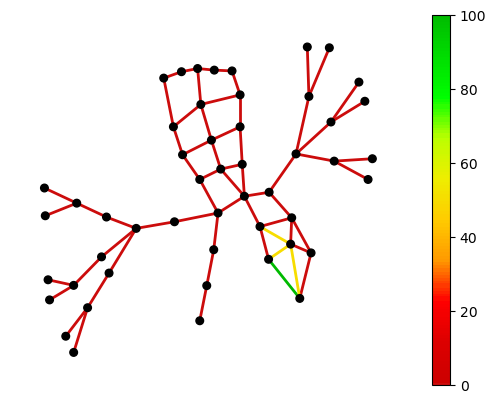

In [8]:


def plot_centrality(G, G2):
    # Compute the closeness centrality of each node in G taking into account the weights of the edges
    ed_G = compute_edge_values(G)

    # Compute the closeness centrality of each node in G2 taking into account the weights of the edges
    ed_G2 = compute_edge_values(G2)

    # Compute the ratio of the closeness centrality of each node in G to the closeness centrality of the same node in G2
    s1 = 0
    s2 = 0
    ratio = []
    for u, v, weight in G.edges(data='weight'):
        u, v =sorted([u, v])
        r1 = ed_G[(u, v)]
        r2 = ed_G2[(u, v)]
        s1 = s1 + r1
        s2 = s2 + r2
        if r2 != 0:
            ratio.append((r1/r2)*100)
        else:
            ratio.append(0)

    # Create a color map for the nodes based on the ratio values
    hsv_modified = cm.get_cmap('nipy_spectral_r', 256)
    color_map = ListedColormap(hsv_modified(np.linspace(0.05, 0.50, 256)))
    # plt.figure(figsize=(10, 5))
    # Draw the graph with the nodes colored according to the ratio values
    #pos = nx.spring_layout(G)
    # nx.draw_networkx_nodes(G, pos, node_size=70, node_color=color_map)
    # nx.draw_networkx_nodes(
    #     G,
    #     pos,
    #     nodelist=G.nodes(),
    #     node_size=80,
    #     node_color=ratio,
    #     # cmap=plt.cm.Blues,
    #     # cmap=plt.cm.Reds_r,
    #     cmap=color_map,
    # )
    # nx.draw_networkx_edges(G, pos)
    # plt.colorbar(cm.ScalarMappable(norm=None, cmap=color_map))
    node_color_map = ['black'] * len(G.nodes())

    # Draw the graph with the edges colored according to their values at ratio list
    # pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos, node_color=node_color_map, node_size=30)
    edge_color_map = ListedColormap(cm.get_cmap('nipy_spectral_r', 256)(np.linspace(0.05, 0.50, 256)))
    sm = ScalarMappable(cmap=edge_color_map, norm=plt.Normalize(vmin=min(ratio), vmax=max(ratio)))
    sm.set_array([])
    nx.draw_networkx_edges(G, pos, edge_color=ratio, edge_cmap=edge_color_map, width=2)
    plt.colorbar(sm)

    # Show the plot
    plt.axis('off')
    plt.savefig('./Images/ae_edge_clustering.png', dpi=800)
    print(round(s1/s2,3))
    plt.show()
plot_centrality(G, G2)

In [9]:
def compute_edge_values(G):
    clustering = {}
    c = 0
    for u, v, data in G.edges(data=True):
        u, v = sorted([u, v])  # Sort the nodes of the edge
        # Get the neighbors of u and v
        neighbors_u = set(G.neighbors(u))
        neighbors_v = set(G.neighbors(v))
        sui = set()
        svi = set()
        suu = set()
        svu = set()
        for i in neighbors_u:
            suu.add(i)
            if G[u][i]['weight'] >= 3:
                sui.add(i)
        for i in neighbors_v:
            svu.add(i)
            if G[v][i]['weight'] >= 3:
                svi.add(i)
        #if (weight[e] <=2):
        #    ph_i = 1
        #else:
            ph_i = 0
        common = neighbors_u.intersection(neighbors_v)
        if common != 0:
            c = c + 1
        nume = len(list(sui.intersection(svi)))
        denom = len(list(suu.union(svu)))
        if (denom - 2> 0):
            clustering[(u, v)] = nume/(denom - 2)
        else:
            clustering[(u, v)] = 0
    return clustering, c
ed_G = compute_edge_values(G)
print(ed_G)
ed_G2 = compute_edge_values(G2)
print(ed_G2)

({('a', 'c'): 0.0, ('b', 'c'): 0.0, ('c', 'd'): 0.0, ('d', 'e'): 0.0, ('e', 'i'): 0.0, ('e', 'm'): 0.0, ('e', 'n'): 0.0, ('f', 'h'): 0.0, ('g', 'h'): 0.0, ('h', 'i'): 0.0, ('j', 'l'): 0.0, ('k', 'l'): 0.0, ('l', 'm'): 0.0, ('n', 'o'): 0.0, ('o', 'p'): 0.0, ('k1', 'o'): 0.0, ('g1', 'o'): 0.0, ('p', 'q'): 0.0, ('p', 's'): 0.0, ('q', 'r'): 0.0, ('k1', 'q'): 0.0, ('q', 't'): 0.0, ('k1', 'r'): 0.0, ('r', 'u'): 0.0, ('f1', 'k1'): 0.0, ('j1', 'k1'): 0.0, ('t', 'w'): 0.0, ('s', 't'): 0.0, ('t', 'u'): 0.0, ('s', 'v'): 0.0, ('e1', 'v'): 0.0, ('v', 'w'): 0.0, ('d1', 'e1'): 0.0, ('c1', 'd1'): 0.0, ('b1', 'c1'): 0.0, ('c1', 'w'): 0.0, ('a1', 'b1'): 0.0, ('a1', 'z'): 0.0, ('w', 'z'): 0.0, ('u', 'z'): 0.0, ('g1', 'h1'): 0.0, ('h1', 'i1'): 0.0, ('f1', 'l1'): 0.0, ('f1', 'p1'): 0.0, ('l1', 'n1'): 0.0, ('j1', 'l1'): 0.0, ('b2', 'l1'): 0.0, ('n1', 'o1'): 0.0, ('b2', 'n1'): 0.0, ('m1', 'o1'): 0.3333333333333333, ('b2', 'o1'): 0.25, ('j1', 'm1'): 0.0, ('b2', 'j1'): 0.2, ('b2', 'm1'): 0.25, ('p1', 'q1'): 0.

C:\Users\camperom\AppData\Local\Temp\ipykernel_2436\2101954063.py:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  hsv_modified = cm.get_cmap('nipy_spectral_r', 256)
C:\Users\camperom\AppData\Local\Temp\ipykernel_2436\2101954063.py:47: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  edge_color_map = ListedColormap(cm.get_cmap('nipy_spectral_r', 256)(np.linspace(0.05, 0.50, 256)))
C:\Users\camperom\AppData\Local\Temp\ipykernel_2436\2101954063.py:51: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, prov

0.03968253968253968


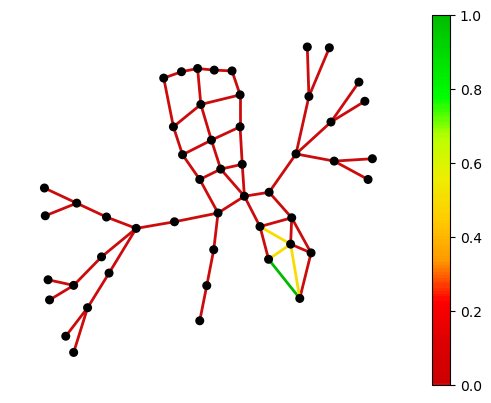

In [10]:
def plot_centrality(G, G2):
    # Compute the closeness centrality of each node in G taking into account the weights of the edges
    ed_G, c1 = compute_edge_values(G)

    # Compute the closeness centrality of each node in G2 taking into account the weights of the edges
    ed_G2, c2 = compute_edge_values(G2)

    # Compute the ratio of the closeness centrality of each node in G to the closeness centrality of the same node in G2
    s1 = 0
    s2 = 0
    ratio = []
    for u, v, weight in G.edges(data='weight'):
        u, v =sorted([u, v])
        r1 = ed_G[(u, v)]
        r2 = ed_G2[(u, v)]
        s1 = s1 + r1
        s2 = s2 + r2
        if r2 != 0:
            ratio.append((r1/r2))
        else:
            ratio.append(0)

    # Create a color map for the nodes based on the ratio values
    hsv_modified = cm.get_cmap('nipy_spectral_r', 256)
    color_map = ListedColormap(hsv_modified(np.linspace(0.05, 0.50, 256)))
    # plt.figure(figsize=(10, 5))
    # Draw the graph with the nodes colored according to the ratio values
    #pos = nx.spring_layout(G)
    # nx.draw_networkx_nodes(G, pos, node_size=70, node_color=color_map)
    # nx.draw_networkx_nodes(
    #     G,
    #     pos,
    #     nodelist=G.nodes(),
    #     node_size=80,
    #     node_color=ratio,
    #     # cmap=plt.cm.Blues,
    #     # cmap=plt.cm.Reds_r,
    #     cmap=color_map,
    # )
    # nx.draw_networkx_edges(G, pos)
    # plt.colorbar(cm.ScalarMappable(norm=None, cmap=color_map))
    node_color_map = ['black'] * len(G.nodes())

    # Draw the graph with the edges colored according to their values at ratio list
    # pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos, node_color=node_color_map, node_size=30)
    edge_color_map = ListedColormap(cm.get_cmap('nipy_spectral_r', 256)(np.linspace(0.05, 0.50, 256)))
    sm = ScalarMappable(cmap=edge_color_map, norm=plt.Normalize(vmin=min(ratio), vmax=max(ratio)))
    sm.set_array([])
    nx.draw_networkx_edges(G, pos, edge_color=ratio, edge_cmap=edge_color_map, width=2)
    plt.colorbar(sm)

    # Show the plot
    plt.axis('off')
    plt.savefig('./Images/ae_edge_clustering.png', dpi=800)
    print(sum(ratio)/c1)
    # print(round(s1/s2,3))
    plt.show()
plot_centrality(G, G2)